<a href="https://colab.research.google.com/github/andressriosg/Topicos-en-Estadistica/blob/main/metodosdeclasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving D. MENORES (1).txt to D. MENORES (1).txt


In [2]:
import pandas as pd
import io
datos_menores = pd.read_csv(io.BytesIO(uploaded['D. MENORES (1).txt']), delimiter='\t')
datos_menores.head(4)

,Directorio,Nro_encuesta,Secuencia_encuesta,Secuencia_p,Orden,P51,P52,P52s1,P53,P54,...,P8582s3,P8582s4,P8582s11,P8582s6,P8582s7,P8582s9,P8582s12,P8582s10,P8582s10a1,Fex_c
0,447,247,4,1,4,4,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1454.129389
1,17255,247,3,1,3,1,NaN,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663.046128
2,373,247,5,1,5,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859
3,373,247,4,1,4,1,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.021859


In [3]:
datos_menores.P52.isnull()

,P52
0,False
1,True
2,True
3,True
4,False
...,...
4086,False
4087,False
4088,True
4089,False


In [4]:
datos_menores.loc[datos_menores.P52.notnull(), "P52"] # Tomé la columna P52 y las filas donde esta no tiene valores faltantes

,P52
0,5.0
4,5.0
5,5.0
6,5.0
7,4.0
...,...
4085,4.0
4086,4.0
4087,1.0
4089,5.0


In [6]:
tabla = datos_menores.loc[datos_menores.P52.notnull(), ["P51", "P52", "P55", "P56", "P57", "P6159s8",
                                                        "P6163s8", "P6161", "P6161s1"]]
# Tomé la columnas "P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8", "P6161", "P6161s1"  y
# las filas donde esta no tiene valores faltantes para P52
tabla.head(3)

,P51,P52,P55,P56,P57,P6159s8,P6163s8,P6161,P6161s1
0,4,5.0,1,1,1,NaN,NaN,1,6.0
4,2,5.0,1,1,1,NaN,NaN,1,3.0
5,2,5.0,1,1,1,1.0,1.0,1,1.0


In [9]:
tabla.P6159s8.isnull() # Las madres que hacen alguna actividad con los menores
tabla.loc[tabla.P6159s8.isnull(), "P6159s8"] = 2 # 2 denota las madres que sí hacen actividades con los hijos
tabla.P6163s8.isnull() # Los padres que hacen alguna actividad con los menores
tabla.loc[tabla.P6163s8.isnull(), "P6163s8"] = 2 # 2 denota los padres que sí hacen actividades con los hijos

In [10]:
tabla.P6163s8.value_counts()

,count
P6163s8,
2.0,2024
1.0,700


In [11]:
dummi_menores = pd.get_dummies(tabla, columns=["P51", "P52", "P55", "P56", "P57", "P6159s8", "P6163s8"], dtype = float)
dummi_menores.head(5)

,P6161,P6161s1,P51_2,P51_3,P51_4,P51_5,P51_6,P51_7,P51_8,P52_1.0,...,P55_1,P55_2,P56_1,P56_2,P57_1,P57_2,P6159s8_1.0,P6159s8_2.0,P6163s8_1.0,P6163s8_2.0
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [12]:
dummi_menores.columns

Index(['P6161', 'P6161s1', 'P51_2', 'P51_3', 'P51_4', 'P51_5', 'P51_6',
       'P51_7', 'P51_8', 'P52_1.0', 'P52_2.0', 'P52_3.0', 'P52_4.0', 'P52_5.0',
       'P52_6.0', 'P55_1', 'P55_2', 'P56_1', 'P56_2', 'P57_1', 'P57_2',
       'P6159s8_1.0', 'P6159s8_2.0', 'P6163s8_1.0', 'P6163s8_2.0'],
      dtype='object')

In [13]:
dummi_menores.rename(columns = {'P51_2':'acu casa', 'P51_3':'acu trab', 'P51_4':'niñera', 'P51_5':"mayor", 'P51_6':"menor", 'P51_7':"solo", 'P51_8':"otra persona"}, inplace = True)
dummi_menores.rename(columns = {'P52_1.0':"lejos", 'P52_2.0':"costoso", 'P52_3.0':"sin cupo", 'P52_4.0':"casa", 'P52_5.0':"edad", 'P52_6.0':"otro motivo"}, inplace = True)
dummi_menores.rename(columns = {'P55_1':"si desa", 'P55_2':"no desa", 'P56_1':"si alm", 'P56_2':"no alm", 'P57_1':"si onces", 'P57_2':"no onces"}, inplace = True)
dummi_menores.rename(columns = {'P6159s8_1.0':"no comp madre", 'P6159s8_2.0':"si comp madre", 'P6163s8_1.0':"no comp padre", 'P6163s8_2.0':"si comp padre"}, inplace = True)
dummi_menores.head(5)

,P6161,P6161s1,acu casa,acu trab,niñera,mayor,menor,solo,otra persona,lejos,...,si desa,no desa,si alm,no alm,si onces,no onces,no comp madre,si comp madre,no comp padre,si comp padre
0,1,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
5,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,1,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
7,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [15]:
x = dummi_menores.drop(["P6161", 'P6161s1'], axis = 1) # Acá tomo todas las variables explicativas: todas las variables menos P6161, la cual me denota si el menor recibe
# control de crecimiento y desarrollo
y = dummi_menores["P6161"].astype(str) # Variable de salida: P6161 (si el menor recibe controles de crecimiento y desarrollo)
y.loc[(y == "1")] = "Si"
y.loc[(y == "2")] = "No"
y.value_counts()

,count
P6161,
Si,2210
No,514


In [16]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [17]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,50,50, 50, 50, 50, 50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'sgd') # Curva de pérdida adam o sgd

In [18]:
mlp_clf.fit(trainX, trainY) # Entrenando el modelo

MLPClassifier(activation='logistic',
              hidden_layer_sizes=(50, 50, 50, 50, 50, 50, 50), max_iter=300,
              solver='sgd')

In [21]:
y_pred = mlp_clf.predict(testX)
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred, testY))) # El modelo no presenta ni underfitting ni overfitting

Accuracy: 0.82


Text(0.5, 1.0, 'Confusion Matrix')

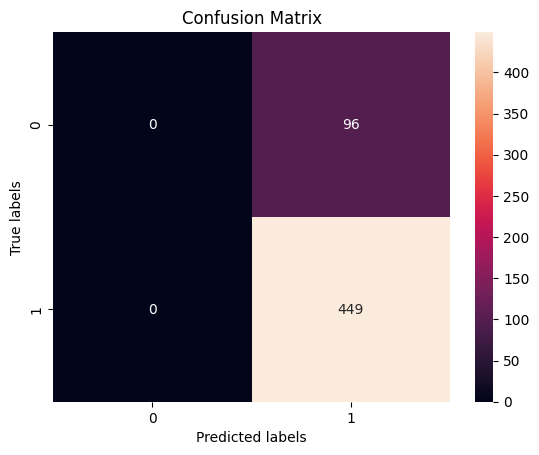

In [22]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm = confusion_matrix(testY, y_pred)
cm
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

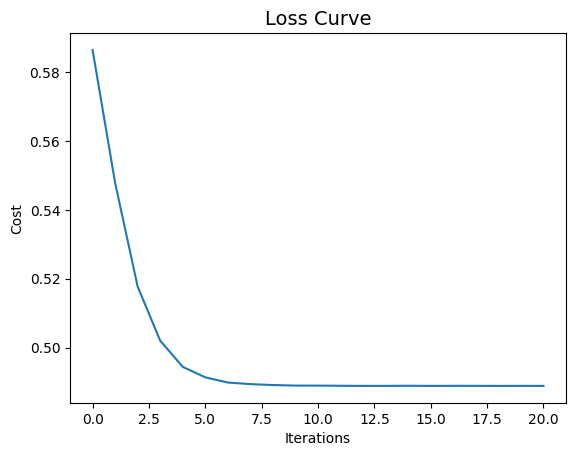

In [23]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=5000, random_state=42, n_jobs = 20)
random_forest.fit(trainX, trainY)
y_pred_random = random_forest.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_random, testY)))

Accuracy: 0.83


Text(0.5, 1.0, 'Confusion Matrix')

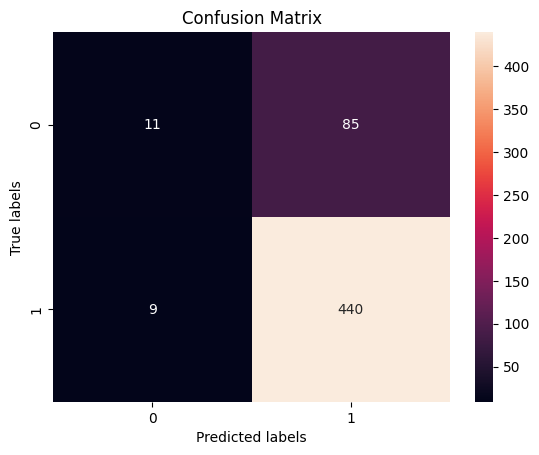

In [31]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm1 = confusion_matrix(testY, y_pred_random)
cm1
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm1, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [38]:
from sklearn.naive_bayes import GaussianNB
clase_bayes = GaussianNB(var_smoothing = 1e-30)
clase_bayes.fit(trainX, trainY)
y_pred_bayes = clase_bayes.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_bayes, testY)))

Accuracy: 0.75


Text(0.5, 1.0, 'Confusion Matrix')

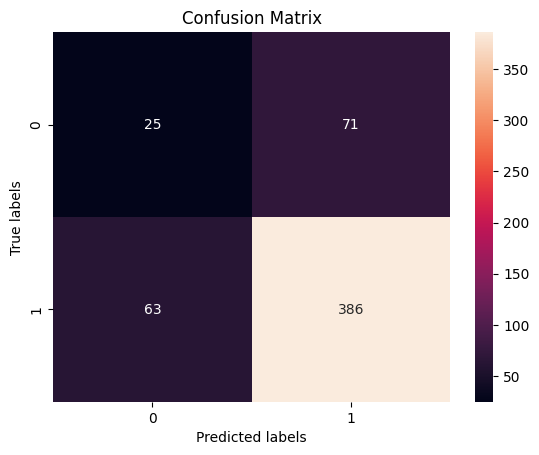

In [39]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_bayes)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [45]:
from sklearn.svm import SVC
soporte_vect = SVC(decision_function_shape='ovr', kernel = "poly", degree = 10)
soporte_vect.fit(trainX, trainY)
y_pred_sopor = soporte_vect.predict(testX)
print('Accuracy: {:.2f}'.format(accuracy_score(y_pred_sopor, testY)))

Accuracy: 0.83


Text(0.5, 1.0, 'Confusion Matrix')

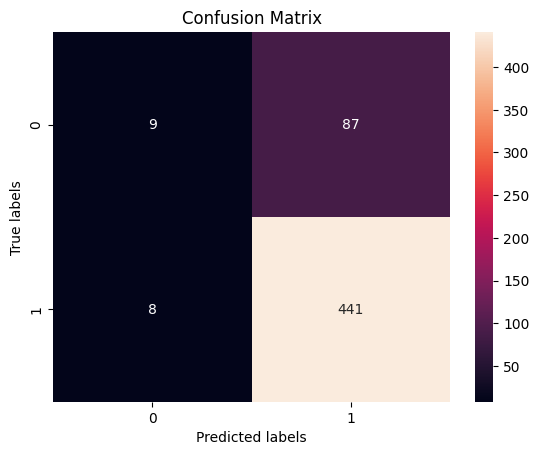

In [46]:
from sklearn.metrics import confusion_matrix
import pylab as pl
cm2 = confusion_matrix(testY, y_pred_sopor)
cm2
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()
sns.heatmap(cm2, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')

In [47]:
import numpy as np
no_obs = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]])
clase_bayes.predict(no_obs)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U2')

In [48]:
trainX.columns

Index(['acu casa', 'acu trab', 'niñera', 'mayor', 'menor', 'solo',
       'otra persona', 'lejos', 'costoso', 'sin cupo', 'casa', 'edad',
       'otro motivo', 'si desa', 'no desa', 'si alm', 'no alm', 'si onces',
       'no onces', 'no comp madre', 'si comp madre', 'no comp padre',
       'si comp padre'],
      dtype='object')

Un  menor no recibe atención cuando: 1. Se queda solo en casa, 2. No puede ir al jardín por falta de cupos, 3. No desayuna, 4. Toma onces, 5. No almuerza, 6. Comparte con su madre, 7. No comparte con su padre

RECOMENDACIONES: Papás no abandonen sus hijos. Que no se queden solos en casa. Alimenten sus hijos